# Anti-Spam - Preliminary data processing

In [ ]:
import nltk
import tensorflow as tf
import keras
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import drive
import os
import re

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [ ]:
drive.mount('/content/drive/')

Mounted at /content/drive/


## _SMS Spam Collection_

In [ ]:
df_sms = pd.read_csv("/content/drive/MyDrive/NLP_datasets/SMSspamcollection/smsspamcollection.csv",sep=',',names=['cat','txt'])
df_sms.head()

,cat,txt
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


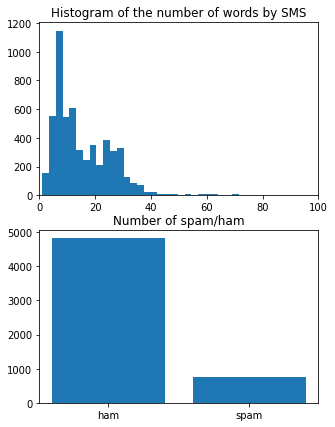

In [ ]:
number_of_words = df_sms['txt'].apply(lambda n: len(n.split()))

plt.figure(figsize=[5,7])
plt.subplot(2,1,1)
plt.hist(number_of_words, 70)
plt.xlim([0,100])
plt.title("Histogram of the number of words by SMS")
plt.subplot(2,1,2)
plt.bar(['ham','spam'], df_sms['cat'].value_counts()[['ham','spam']])
plt.title("Number of spam/ham")
plt.show()

## Enron

In [ ]:
df_enr = pd.DataFrame(columns=['cat', 'sub', 'txt'])
#df = df.append({'cat':'test_cat', 'sub':'test_sub', 'txt':'test_txt'}, ignore_index=True)

# Insert ham mails
dir_enron_ham = 'drive/MyDrive/NLP_datasets/enron/ham'
for filename in os.listdir(dir_enron_ham):
  with open(os.path.join(dir_enron_ham, filename), 'r', encoding="utf8", errors='ignore') as f:
    list_text = f.readlines()
    sub = list_text[0][9:].rstrip() # Parse the subject line
    txt = ' '.join(list_text[1:])
    df_enr = df_enr.append({'cat':'ham', 'sub':sub, 'txt':txt}, ignore_index=True)
    f.close()

# Insert spam mails
dir_enron_spam = 'drive/MyDrive/NLP_datasets/enron/spam'
for filename in os.listdir(dir_enron_spam):
  with open(os.path.join(dir_enron_spam, filename), 'r', encoding="utf8", errors='ignore') as f:
    try:
      list_text = f.readlines()
    except:
      print(filename)
    sub = list_text[0][9:].rstrip() # Parse the subject line
    txt = ' '.join(list_text[1:])
    df_enr = df_enr.append({'cat':'spam', 'sub':sub, 'txt':txt}, ignore_index=True)
    f.close()

df_enr.head()

,cat,sub,txt
0,ham,an opportunity to change your electricity prov...,electricity deregulation is coming to texas !\...
1,ham,"enron nom for march 7 , 2001",( see attached file : hplno 307 . xls )\n - hp...
2,ham,cleburne gas,please plan on attending a meeting regarding c...
3,ham,re : noms / actual flow for 03 / 05,"we agree\n "" eileen ponton "" on 03 / 06 / 2001..."
4,ham,lng - europe,please follow up .\n eric\n - - - - - - - - - ...


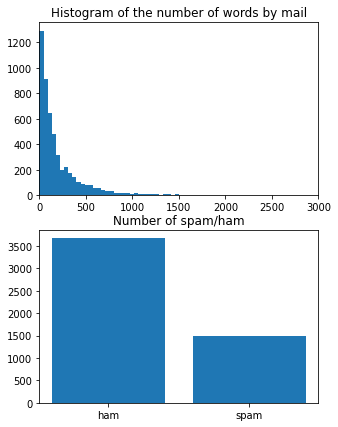

In [ ]:
number_of_words = df_enr['txt'].apply(lambda n: len(n.split()))

plt.figure(figsize=[5,7])
plt.subplot(2,1,1)
plt.hist(number_of_words, 200)
plt.xlim([0,3000])
plt.title("Histogram of the number of words by mail")
plt.subplot(2,1,2)
plt.bar(['ham','spam'], df_enr['cat'].value_counts()[['ham','spam']])
plt.title("Number of spam/ham")
plt.show()

## Spam Assassin

In [ ]:
df_ass = pd.DataFrame(columns=['cat', 'sub', 'txt'])
re_sub = re.compile('[Ss]ubject ?:')

# Insert ham mails

dirs_ham = ['easy_ham', 'easy_ham_2']
for dir_ext in dirs_ham:
  dir_spamassassin_ham = 'drive/MyDrive/NLP_datasets/spamassassin/'+dir_ext
  for filename in os.listdir(dir_spamassassin_ham):
    with open(os.path.join(dir_spamassassin_ham, filename), 'r', encoding="utf8", errors='ignore') as f:
      sub = ""
      txt = ""
      header = True
      for line in f:
        line = line.rstrip()
        if header:
          if line == "":
            header = False
          elif re_sub.match(line):
            sub = line[re_sub.match(line).span()[1]:] # Parse the subject line
        else:
          txt = txt + " " + line 
      txt = txt[1:]
      df_ass = df_ass.append({'cat':'ham', 'sub':sub, 'txt':txt}, ignore_index=True)
      f.close()

FileNotFoundError: ignored

In [ ]:
# Insert spam mails
dirs_spam = ['spam', 'spam_2']
for dir_ext in dirs_spam:
  dir_spamassassin_spam = 'drive/MyDrive/NLP_datasets/spamassassin/'+dir_ext
  for filename in os.listdir(dir_spamassassin_spam):
    with open(os.path.join(dir_spamassassin_spam, filename), 'r', encoding="utf8", errors='ignore') as f:
      ub = ""
      txt = ""
      header = True
      for line in f:
        line = line.rstrip()
        if header:
          if line == "":
            header = False
          elif re_sub.match(line):
            sub = line[re_sub.match(line).span()[1]:] # Parse the subject line
        else:
          txt = txt + " " + line 
      txt = txt[1:]
      df_ass = df_ass.append({'cat':'spam', 'sub':sub, 'txt':txt}, ignore_index=True)
      f.close()

df_ass.head()

,cat,sub,txt
0,ham,[SAdev] [Bug 1008] SpamAssassin does not work...,http://www.hughes-family.org/bugzilla/show_bug...
1,ham,[SAdev] [Bug 839] mailbox corruption not fixe...,http://www.hughes-family.org/bugzilla/show_bug...
2,ham,[Spambayes] test sets?,">>>>> ""GvR"" == Guido van Rossum <guido@python..."
3,ham,Re: [Razor-users] Razor with sendmail,"""Bort, Paul"" <pbort@tmwsystems.com> wrote: >If..."
4,ham,Jeremy Zawodny who works at Yahoo Finance off...,URL: http://scriptingnews.userland.com/backiss...


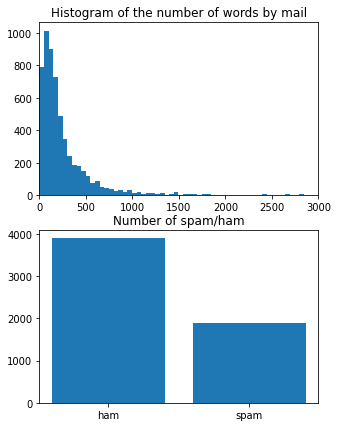

In [ ]:
number_of_words = df_ass['txt'].apply(lambda n: len(n.split()))

plt.figure(figsize=[5,7])
plt.subplot(2,1,1)
plt.hist(number_of_words, 300)
plt.xlim([0,3000])
plt.title("Histogram of the number of words by mail")
plt.subplot(2,1,2)
plt.bar(['ham','spam'], df_ass['cat'].value_counts()[['ham','spam']])
plt.title("Number of spam/ham")
plt.show()

## Preprocessing

In [ ]:
from nltk.corpus import wordnet

def preprocessing(df, bool_sub):
  # Lowercase
  txt_tkn = df['txt'].str.lower()
  if bool_sub: 
    sub_tkn = df['sub'].str.lower()

  # Remove numbers, hyperlinks, punctuation and EOL char
  #txt_tkn = txt_tkn.apply(lambda str: re.sub(r'^https?:\/\/.*[\r\n]*', '', str))
  #txt_tkn = txt_tkn.apply(lambda str: re.sub(r'\d+', '', str))
  #txt_tkn = txt_tkn.apply(lambda str: re.sub(r'[^\w\s]', ' ', str))
  #if bool_sub:
  #  sub_tkn = sub_tkn.apply(lambda str: re.sub(r'^https?:\/\/.*[\r\n\s]*', '', str))
  #  sub_tkn = sub_tkn.apply(lambda str: re.sub(r'\d+', '', str))
  #  sub_tkn = sub_tkn.apply(lambda str: re.sub(r'[^\w\s]', ' ', str))

  # Tokenize
  stop_words = set(stopwords.words('english'))
  stemmer = PorterStemmer()
  lemmatizer = WordNetLemmatizer()

  tokenized_txt = []
  for str in txt_tkn:
    
    str = re.sub(r'^https?:\/\/.*[\r\n\s]*', '', str)
    str = re.sub(r'', '', str)
    str = re.sub(r'\d+', '', str)
    str = re.sub(r'[^\w\s]', ' ', str)


    words = word_tokenize(str)
    # Remove stopwords
    words = [w for w in words if not w in stop_words]
    # Stemmatization
    #words = [stemmer.stem(w) for w in words]
    # Lemmatization
    words = [lemmatizer.lemmatize(w,pos=wordnet.NOUN) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.VERB) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.ADJ) for w in words]
    #filtered_sentence = []
      
    #for w in word_tokens:
    #    if w not in stop_words:
    #        filtered_sentence.append(w)
    
    tokenized_txt.append(words)

  df['txt_tkn'] = tokenized_txt

  # sub
  tokenized_sub = []
  for str in sub_tkn:
    
    str = re.sub(r'^https?:\/\/.*[\r\n\s]*', '', str)
    str = re.sub(r'', '', str)
    str = re.sub(r'\d+', '', str)
    str = re.sub(r'[^\w\s]', ' ', str)


    words = word_tokenize(str)
    # Remove stopwords
    words = [w for w in words if not w in stop_words]
    # Stemmatization
    #words = [stemmer.stem(w) for w in words]
    # Lemmatization
    words = [lemmatizer.lemmatize(w,pos=wordnet.NOUN) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.VERB) for w in words]
    words = [lemmatizer.lemmatize(w,pos=wordnet.ADJ) for w in words]
    #filtered_sentence = []
      
    #for w in word_tokens:
    #    if w not in stop_words:
    #        filtered_sentence.append(w)
    
    tokenized_sub.append(words)

  df['sub_tkn'] = tokenized_sub

In [ ]:
preprocessing(df_ass, True)
df_ass

NameError: ignored

In [ ]:
preprocessing(df_enr, True)
df_enr

,cat,sub,txt,txt_tkn,sub_tkn
0,ham,an opportunity to change your electricity prov...,electricity deregulation is coming to texas !\...,"[electricity, deregulation, come, texas, great...","[opportunity, change, electricity, provider]"
1,ham,"enron nom for march 7 , 2001",( see attached file : hplno 307 . xls )\n - hp...,"[see, attach, file, hplno, xl, hplno, xl]","[enron, nom, march]"
2,ham,cleburne gas,please plan on attending a meeting regarding c...,"[please, plan, attend, meet, regard, cleburne,...","[cleburne, gas]"
3,ham,re : noms / actual flow for 03 / 05,"we agree\n "" eileen ponton "" on 03 / 06 / 2001...","[agree, eileen, ponton, pm, david, avila, lsp,...","[noms, actual, flow]"
4,ham,lng - europe,please follow up .\n eric\n - - - - - - - - - ...,"[please, follow, eric, forward, eric, gonzales...","[lng, europe]"
...,...,...,...,...,...
5167,spam,who are you ?,your needed soffttwares at rock bottom prri ce...,"[need, soffttwares, rock, bottom, prri, ce, bu...",[]
5168,spam,sexually - explicit : angelina jolie strip . p...,sexually - explicit :\n this e - mail contains...,"[sexually, explicit, e, mail, contain, image, ...","[sexually, explicit, angelina, jolie, strip, p..."
5169,spam,adip - ren 720 - find out the latest facts . a...,want to lose weight ?\n the most powerful weig...,"[want, lose, weight, powerful, weightloss, ava...","[adip, ren, find, late, fact, alhambra]"
5170,spam,"best rates on medication , shipping worldwide !",malikadna duddery persimmon humankind omnipote...,"[malikadna, duddery, persimmon, humankind, omn...","[best, rate, medication, ship, worldwide]"


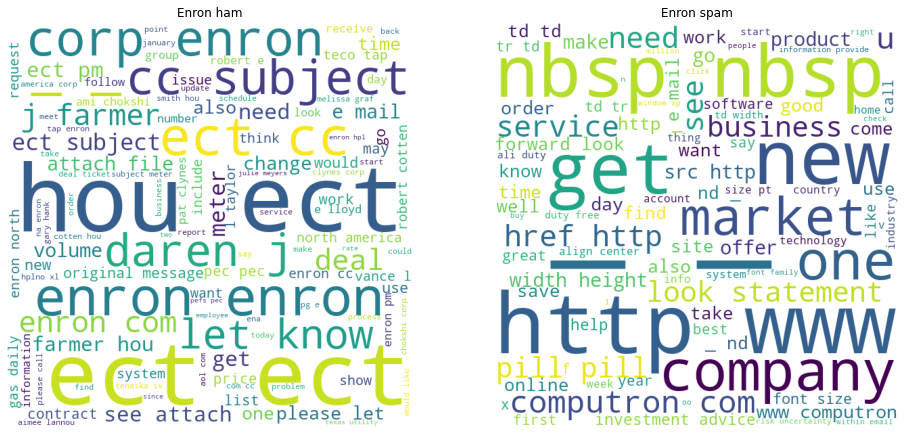

In [ ]:
input_txt_ham = " ".join([" ".join(list_of_words) for list_of_words in df_enr['txt_tkn'][df_enr['cat']=='ham']])
input_txt_spam = " ".join([" ".join(list_of_words) for list_of_words in df_enr['txt_tkn'][df_enr['cat']=='spam']])
#input_txt = " ".join(df_ass['txt'])

wordcloud_ham = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(input_txt_ham)

wordcloud_spam = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(input_txt_spam)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8))

plt.subplot(1,2,1)
plt.imshow(wordcloud_ham)
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.title('Enron ham')

plt.subplot(1,2,2)
plt.imshow(wordcloud_spam)
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.title('Enron spam')
 
plt.show()

In [ ]:
input_txt_ham = " ".join([" ".join(list_of_words) for list_of_words in df_ass['txt_tkn'][df_ass['cat']=='ham']])
input_txt_spam = " ".join([" ".join(list_of_words) for list_of_words in df_ass['txt_tkn'][df_ass['cat']=='spam']])
#input_txt = " ".join(df_ass['txt'])

wordcloud_ham = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(input_txt_ham)

wordcloud_spam = WordCloud(width = 600, height = 600,
                background_color ='white',
                stopwords = stopwords.words('english'),
                min_font_size = 10).generate(input_txt_spam)
 
# plot the WordCloud image                      
plt.figure(figsize = (16, 8))

plt.subplot(1,2,1)
plt.imshow(wordcloud_ham)
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.title('Enron ham')

plt.subplot(1,2,2)
plt.imshow(wordcloud_spam)
plt.axis("off")
#plt.tight_layout(pad = 0)
plt.title('Enron spam')
 
plt.show()

In [ ]:
df_sms

,cat,txt
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [ ]:
df_enr.head(1)

,cat,sub,txt,txt_tkn,sub_tkn
0,ham,an opportunity to change your electricity prov...,electricity deregulation is coming to texas !\...,"[electricity, deregulation, come, texas, great...","[opportunity, change, electricity, provider]"


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_enr['txt'], df_enr['cat'], test_size=0.2)

In [ ]:
X_train.shape

(4137,)

In [ ]:
import scipy

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
tokenizer = Tokenizer(num_words=10000, oov_token='<UNK>')
tokenizer.fit_on_texts(X_train)

In [ ]:
X_train[0]

"electricity deregulation is coming to texas !\n what a great way to start off the new year \x01 ) to be able to choose your\n electricity provider , which could mean potential savings for you and your\n family on your electric bill . as you know , enron has been a leader in\n lobbying for deregulation and a consumer \x01 , s right to choose energy providers .\n for the first time in our state \x01 , s history , 5 percent of texas households will\n have this golden opportunity . the newpower company ( newpower ) , which is\n approximately 45 percent owned by enron , was recently formed to provide\n energy and energy - related services to residential customers in deregulating\n energy markets across america , including texas . for a limited time ,\n houston - based employees will be eligible to participate in newpower \x01 , s pilot\n program offering their deregulated electric service .\n be among the first to participate :\n enrollment with newpower begins march 12 . also , watch for 

In [ ]:
X_train_tok = tokenizer.texts_to_sequences(X_train)
X_train_tok = pad_sequences(X_train_tok, truncating = 'post', padding='post', maxlen=50)

In [ ]:
X_train_tok[0]

array([  59,   54,    9,   33,   90,   35,    9,   54, 1416,   41,    1,
          7,  112,   43,    7,  239,   13,   41, 1334,   38,   26,   85,
         63,   79,   74,   41, 1131, 1693,   63,    2, 1820, 2770, 3083,
         13,   50,  663, 6781,   75,   10,   31,   12,  239,   43,   26,
         57,  261,   38,    1,    0,    0], dtype=int32)

In [ ]:
X_train_tok.shape

(4137, 50)

In [ ]:
import numpy as np

In [ ]:
y_train_tok = [[1,0] if word == 'ham' else [0,1] for word in y_train]
y_train_tok = np.asarray(y_train_tok)

In [ ]:
y_train_tok.shape

(4137, 2)

In [ ]:
y_train_tok[0]

array([1, 0])

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Embedding(10000,1,input_length=50),
tf.keras.layers.LSTM(20, return_sequences=True),
tf.keras.layers.LSTM(20),
tf.keras.layers.Dense(2, activation='softmax')
])
model.compile(
     loss='categorical_crossentropy',
     optimizer='adam',
     metrics=['accuracy']
)

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 50, 1)             10000     
                                                                 
 lstm_4 (LSTM)               (None, 50, 20)            1760      
                                                                 
 lstm_5 (LSTM)               (None, 20)                3280      
                                                                 
 dense_4 (Dense)             (None, 2)                 42        
                                                                 
Total params: 15,082
Trainable params: 15,082
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(
     X_train_tok, y_train_tok,
     epochs=5)


Epoch 1/5
130/130 [==============================] - 9s 8ms/step - loss: 0.5115 - accuracy: 0.7542
Epoch 2/5
130/130 [==============================] - 1s 8ms/step - loss: 0.1184 - accuracy: 0.9565
Epoch 3/5
130/130 [==============================] - 1s 8ms/step - loss: 0.0543 - accuracy: 0.9840
Epoch 4/5
130/130 [==============================] - 1s 8ms/step - loss: 0.0345 - accuracy: 0.9894
Epoch 5/5
130/130 [==============================] - 1s 8ms/step - loss: 0.0282 - accuracy: 0.9911


In [ ]:
list(map(lambda x: x.name, model.layers))

['embedding_5', 'lstm_4', 'lstm_5', 'dense_4']

In [ ]:
intermediate_output = tf.keras.Model(model.input, 
                                     model.get_layer('embedding_5').output)

In [ ]:
first = intermediate_output(np.reshape(X_train_tok[1], (1,50)))

In [ ]:
first.shape

TensorShape([1, 50, 1])

In [ ]:
intermediate_output = tf.keras.Model(model.get_layer('embedding_5').output, 
                                     model.get_layer('lstm_4').output)

In [ ]:
first = intermediate_output(first)

In [ ]:
first.shape

TensorShape([1, 50, 20])

In [ ]:
first = np.swapaxes(first,0,1)

In [ ]:
first.shape

TensorShape([1, 50, 20])

In [ ]:
model.get_layer('lstm_4').output

<KerasTensor: shape=(None, 50, 20) dtype=float32 (created by layer 'lstm_4')>

In [ ]:
intermediate_output = tf.keras.Model(model.get_layer('lstm_4').output, 
                                     model.get_layer('lstm_5').output)

In [ ]:
first = intermediate_output(first)

In [ ]:
first.shape

TensorShape([1, 20])

In [ ]:
intermediate_output = tf.keras.Model(model.get_layer('lstm_5').output, 
                                     model.get_layer('dense_4').output)

In [ ]:
first = intermediate_output(first)

In [ ]:
first

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[9.9950969e-01, 4.9027614e-04]], dtype=float32)>

In [ ]:
model.predict(np.reshape(X_train_tok[1], (1,50)))

1/1 [==============================] - 1s 620ms/step


array([[9.9950969e-01, 4.9027614e-04]], dtype=float32)

In [ ]:
X_train_tok.shape

(4137, 50)

In [ ]:
n_of_points = X_train_tok.shape[0]
X = np.zeros((n_of_points,1070))
for i in range(n_of_points):
  if(i%100 == 99):
    print(i+1)
  val = []
  out = np.reshape(X_train_tok[i], (1,50))
  last_lay_input = None
  for lay in list(map(lambda x: x.name, model.layers)):
    if(last_lay_input is None ):
      last_lay_input = model.input
    intermediate_output = tf.keras.Model(last_lay_input, model.get_layer(lay).output)
    out = intermediate_output(out)
    val.append(tf.reshape(out, [-1]))
    last_lay_input = model.get_layer(lay).output
  X[i,:] = np.concatenate(val[0:-1])

In [ ]:
X.shape

(4137, 1070)

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
y_lr = [ 1 if word == 'ham' else 0 for word in y_train]

In [ ]:
clf = LogisticRegression(penalty='l2').fit(X, y_lr)

In [ ]:
clf.coef_

array([[-0.26630521,  0.11334684,  0.1402574 , ...,  0.02660557,
        -0.5866652 , -0.06973854]])

In [ ]:
np.flip(np.argsort(np.absolute(clf.coef_)))

array([[1060, 1055, 1052, ...,  477,  300,  530]])

In [ ]:
clf.coef_[0][1060]

-0.9559977779645022

In [ ]:
clf.coef_[0][1055]

0.7775364413159016